## Quantium Analytics Customer Analysis

#### This Project is aimed at understanding customer behaviour through a year's transaction and providing recomendations from the same to the Chip segment manager. This will aid the company on an enterprise level to understand the the customers to be targeted for increased sales.

In [41]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Setting seaborn as default style
    

In [42]:
# Loading the data sets from google drive.
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vS4MqswS0ISKSntl85QN9aOo7r_6tRiftdPCakXYfc2WZ4bH1Zad0DANYL6BaNq1MyPG8Yq4nN7q8xi/pub?output=csv"
transact_df=pd.read_csv(path)
transact_df.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [43]:
# Loading transctional data from google drive
path_1="https://docs.google.com/spreadsheets/d/e/2PACX-1vT6Tr4sh8b1XcXn477IEMWVfsA-v4qF3M-BNF9s4Wka7pMru71W4PTaTuhQ4K6chQ/pub?output=csv"
customer_df=pd.read_csv(path_1)
customer_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Cleaning Transactional data

In [44]:
def dataset_info(df):
    '''This will mainly output the head, the tail and the shape of the dataset'''
    print(df.head())
    print(df.tail())
    print(f"The transactional dataset has {transact_df.shape[0]} rows and {transact_df.shape[1]} columns")

In [45]:
# Properties of my dataset.
dataset_info(transact_df)

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
       LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream
The transactional dataset has 72637 rows and 3 columns


In [46]:
# Checking for missing values
missing_val=transact_df.isnull().any()
missing_val
# The dataset is clean. There are no missing values in the dataset

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [47]:
# Checking for duplicates
transact_df.duplicated().any()
# This is clean we dont have duplicated rows

False

In [48]:
#Anomally detection in categorical columns
for col in transact_df.iloc[:,1:]:
    value_df=transact_df[col].value_counts()
    print(value_df)
# No anomally or outlier detected in both lifestyle and premium columns

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64
Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


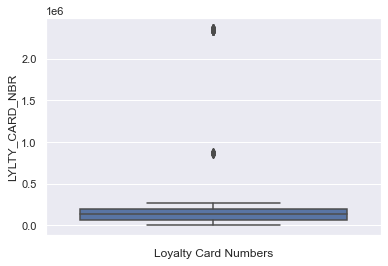

In [70]:
# Checking for outliers in Loyalty card numbers
fig=sns.boxplot(y=transact_df['LYLTY_CARD_NBR'])
fig.set_xlabel("Loyalty Card Numbers")
fig.set_axis_on()
# Some figures seem to be beyond the 3rd Quartile. They will be treated as inliers since loyalty card number can exted to whichever value.


### Cleaning Customer data

In [50]:
# Clear view
customer_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [51]:
#Properties of my dataset
dataset_info(customer_df)

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834 

In [52]:
# Dropping unnecessary columns
customer_df1=customer_df.drop(['DATE'],axis=1)
customer_df1.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [53]:
# Checking for missing values
customer_df1.isnull().sum()

STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [54]:
# Checking for duplicated values
customer_df1.duplicated().sum()
# We have duplicated values. We drop them to  avoid ambiguity
customer_df2=customer_df1.drop_duplicates()

In [55]:
# Rechecking for duplicates
customer_df2.duplicated().any()
# No duplicates detected.

False

Outlier detection in customer data

<AxesSubplot:title={'center':'Total Sales'}, ylabel='TOT_SALES'>

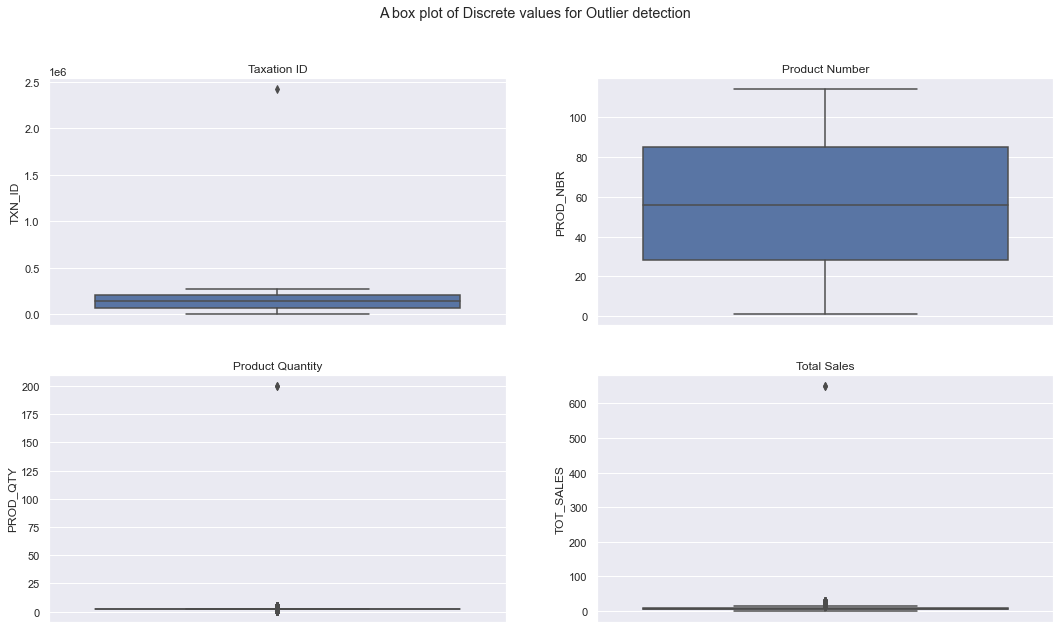

In [87]:
# Constructing subplots
fig, axes = plt.subplots(2,2,figsize=(18,10)) 
fig.suptitle("A box plot of Discrete values for Outlier detection")
# Setting first graph
axes[0,0].set_title("Taxation ID")
sns.boxplot(ax=axes[0,0],data=customer_df2,y="TXN_ID")
# Setting second graph
axes[0,1].set_title("Product Number")
sns.boxplot(ax=axes[0,1],data=customer_df2,y="PROD_NBR")
# Setting third graph
axes[1,0].set_title("Product Quantity")
sns.boxplot(ax=axes[1,0],data=customer_df2,y="PROD_QTY")
# Setting fourth graph
axes[1,1].set_title("Total Sales")
sns.boxplot(ax=axes[1,1],data=customer_df2,y="TOT_SALES")
# There are outliers present in Taxation ID, Product quantity and Total sales

<AxesSubplot:ylabel='TXN_ID'>

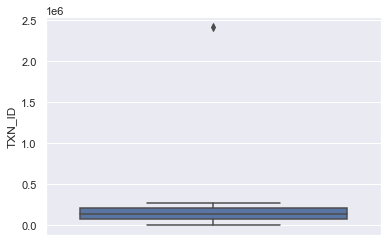

In [119]:
# Checking for outliers in continous variables
sns.boxplot(data=customer_df2,y="TXN_ID")

#### Outliers detected in several columns
##### Outlier removal proceedures